**Principal Component Analysis (PCA)**   
is a popular dimensionality reduction technique used in machine learning and data analysis.   
The main objective of PCA is to reduce the number of features in a dataset while retaining as much of the variance in the data as possible. This is achieved by projecting the data onto a lower-dimensional space that captures the most significant variations in the data.   
In this project, I will implement PCA using Python's numpy and pandas libraries and apply it to the famous Iris dataset.

## 1, Load Dependencies and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris


In [3]:
# Load the iris dataset
iris = load_iris()
# Convert the data to a pandas dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


 Iris dataset is a multivariate dataset introduced by the British statistician Ronald Fisher in 1936. The dataset contains 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The samples are divided equally into three classes: Iris Setosa, Iris Versicolor, and Iris Virginica. The dataset is very widely used.  

## 2, Data Preprocessing

In [4]:
# Standardize the data
mean = df.mean(axis=0)
std = df.std(axis=0)
df = (df - mean) / std


Standardizing the data is a crucial step in PCA, as it ensures that all features have equal importance in the analysis.

In [5]:
# Compute the covariance matrix
cov_matrix = np.cov(df.T)
cov_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

## 3, Compute the components

In [6]:
# Compute the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvectors by decreasing eigenvalues
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]


The eigenvectors are the principal components of the data, and the eigenvalues represent the variance of the data along each principal component.

## 4, Project the data on the components (Calculate the projections)  

In [7]:
# Project the data onto the first two principal components
projected = np.dot(df, eigenvectors[:, :2])


## 5, Evaluations

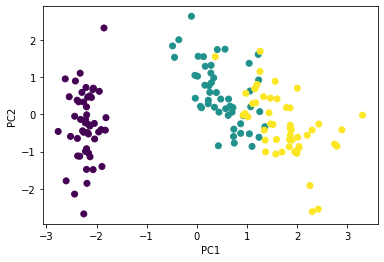

In [8]:
# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(projected[:, 0], projected[:, 1], c=iris.target)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

By projecting the Iris dataset onto the first two principal components, we can visualize the data in a 2D space and observe how the different classes are separated. 